In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [4]:
DataDir = '/Users/Nathan/Documents/Berkeley/Chemical_Evolution/DEIMOS/'
ObsRun = 'U112'
Mask = 'm15msk'

PlotDir = 'spec1d_plots/'

#FileDir = DataDir + 'wlmmsk/'
#FileName = FileDir + 'spec1d.wlmmsk.txt'

#FileDir = DataDir + 'pegmsk/'
#FileName = FileDir + 'spec1d.pegmsk.txt'

#FileDir = DataDir + 'm13msk/'
#FileName = FileDir + 'spec1d.m13msk.txt'

FileDir = DataDir + ObsRun + '/' + Mask +'/'
FileName = FileDir + 'spec1d.m15msk.txt'

#FileDir = DataDir + 'm17msk/'
#FileName = FileDir + 'spec1d.m17msk.txt'

#FileDir = DataDir + 'm2msk/'
#FileName = FileDir + 'spec1d.m2msk.txt'

#FileDir = DataDir + 'n19msk/'
#FileName = FileDir + 'spec1d.n19msk.txt'

#FileDir = DataDir + 'n76msk/'
#FileName = FileDir + 'spec1d.n76msk.txt'

savefig = False

In [5]:
ObjListFile = open(FileName,'r')
ObjList = ObjListFile.read().split('\n')[:-2]
ObjListFile.close()

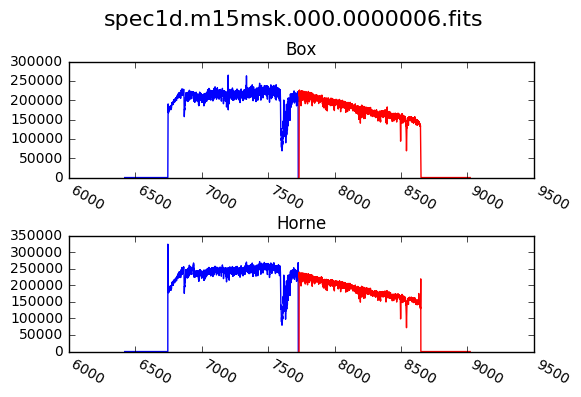

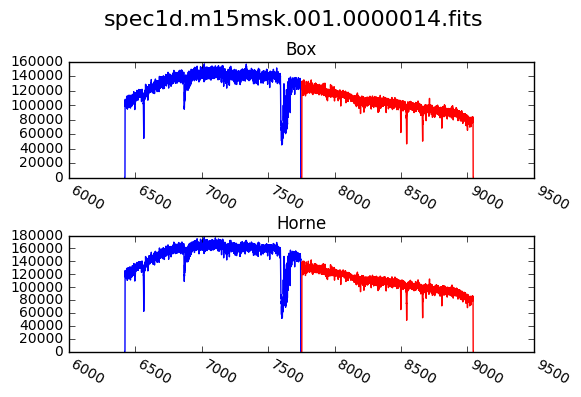

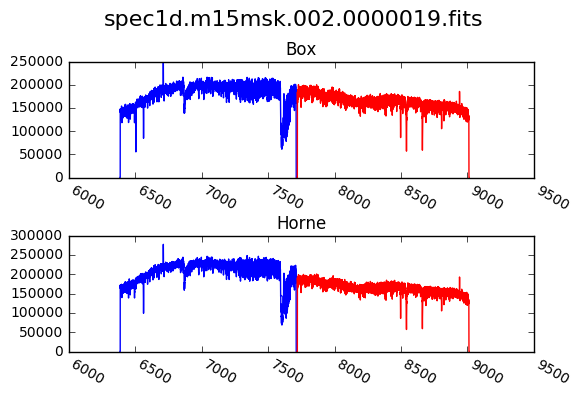

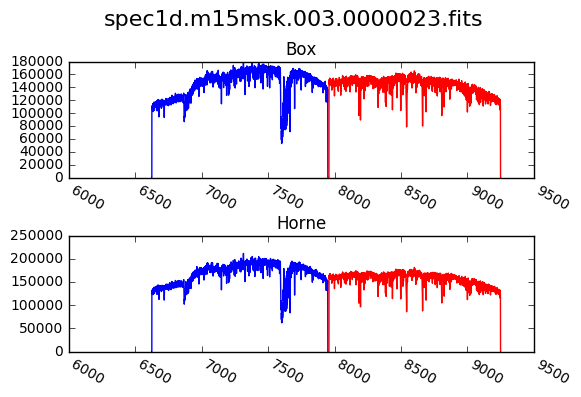

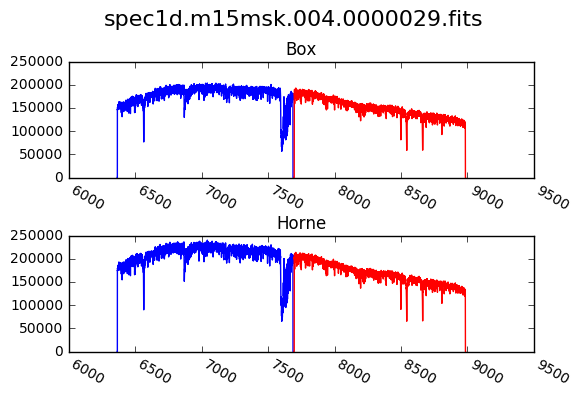

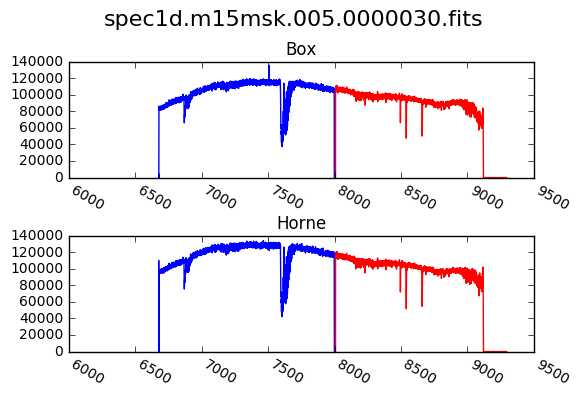

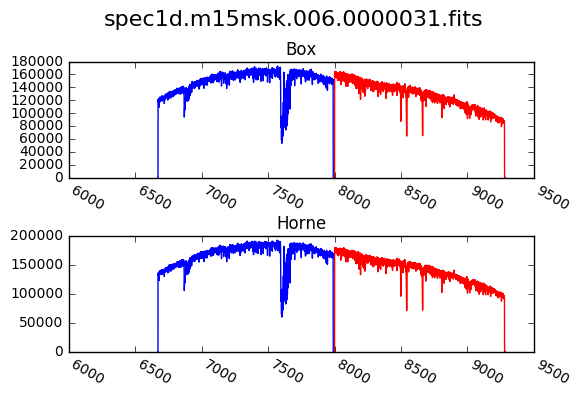

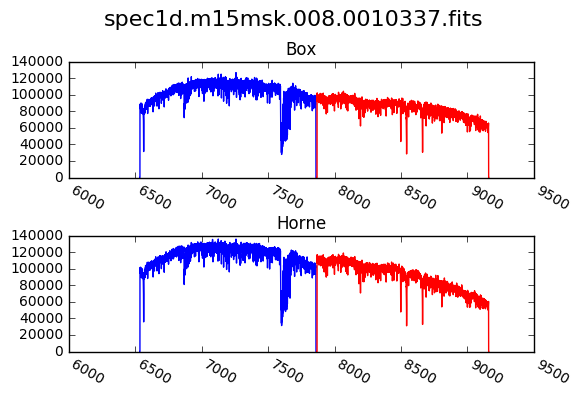

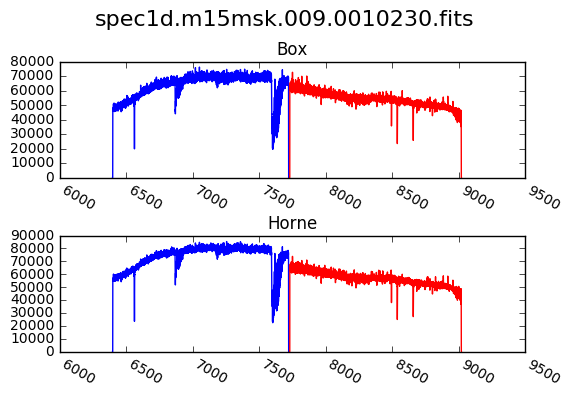

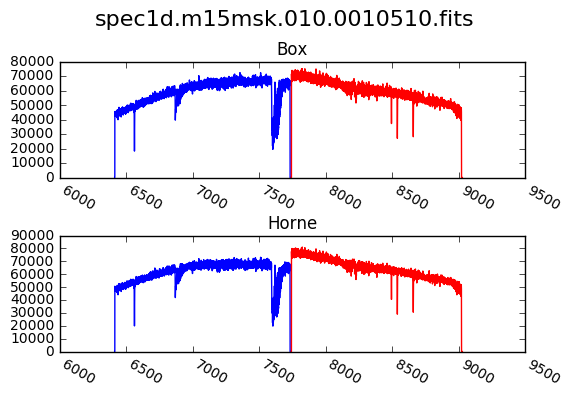

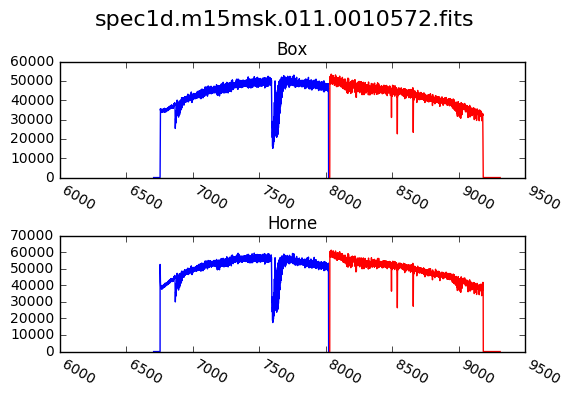

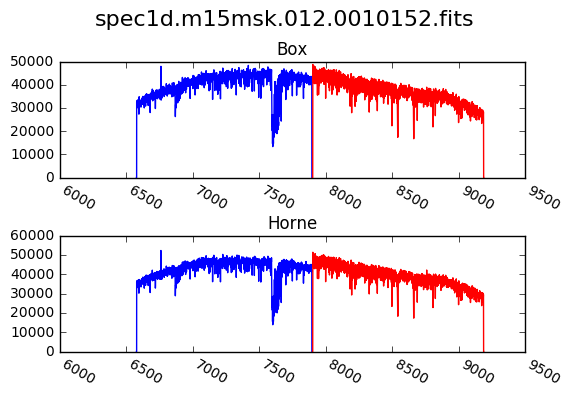

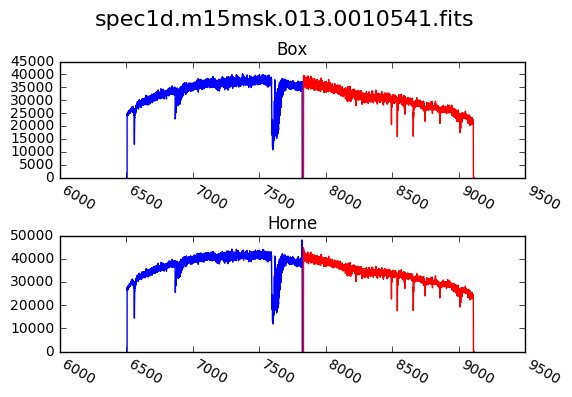

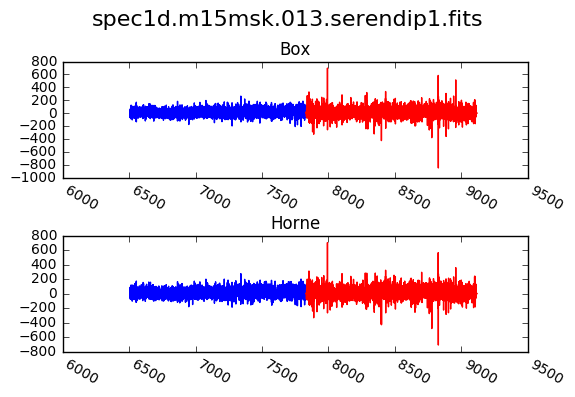

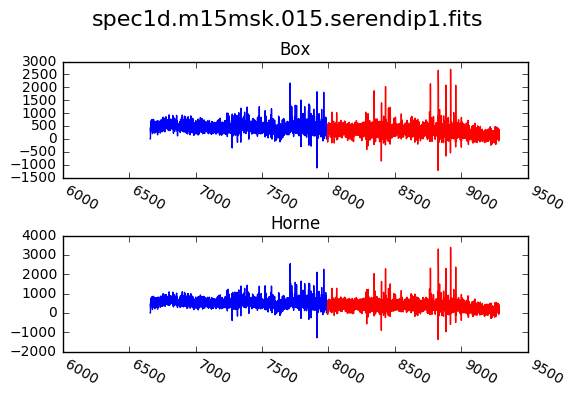

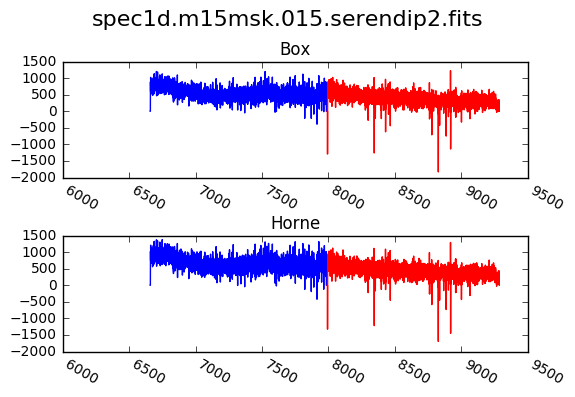

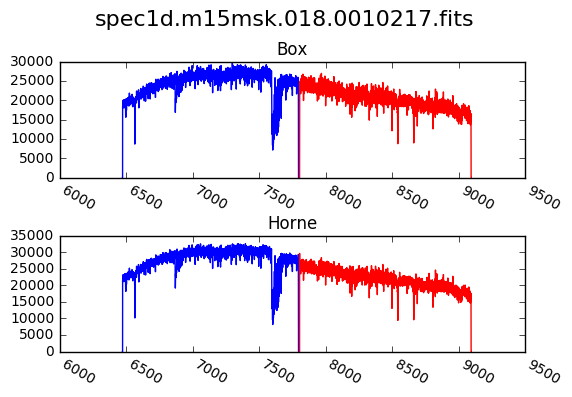

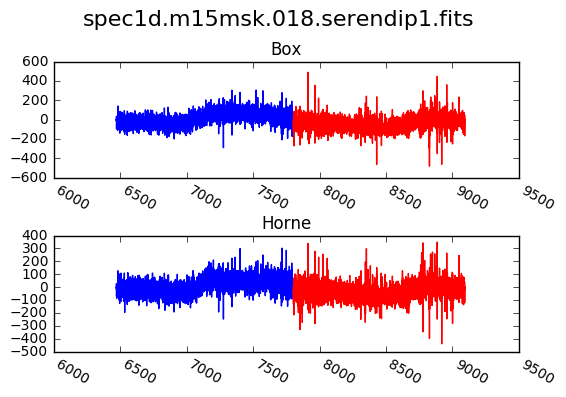

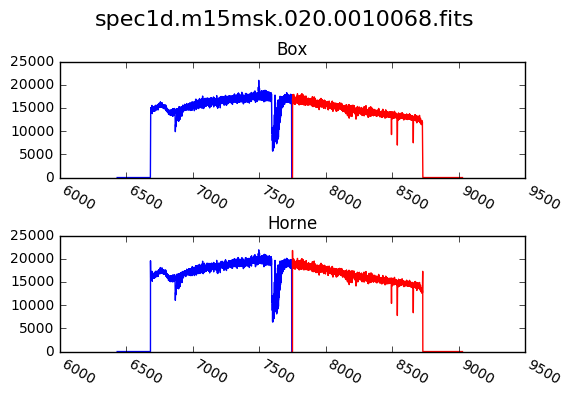

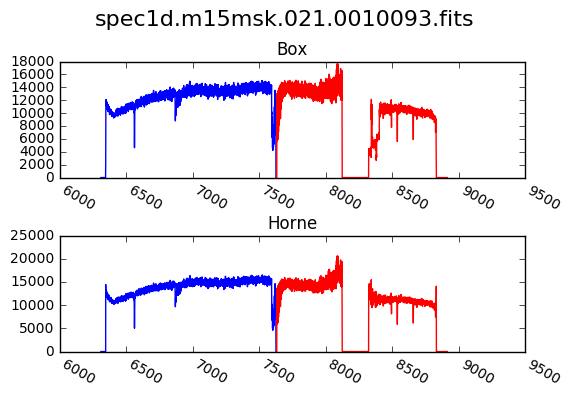

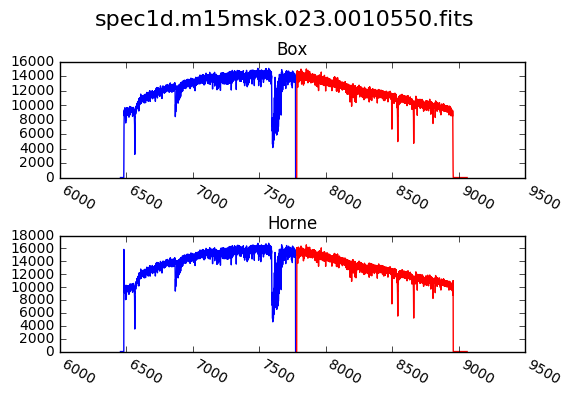

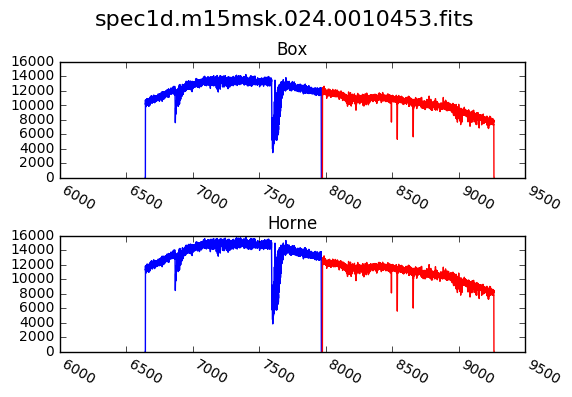

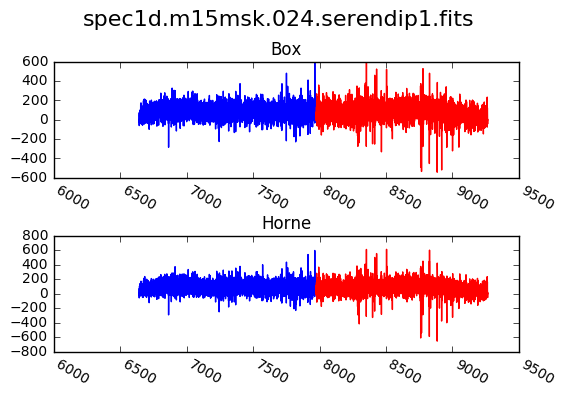

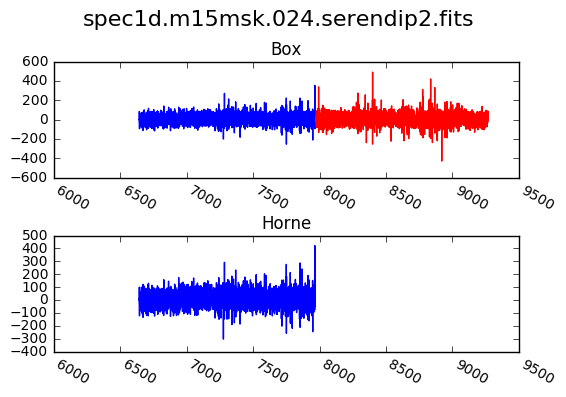

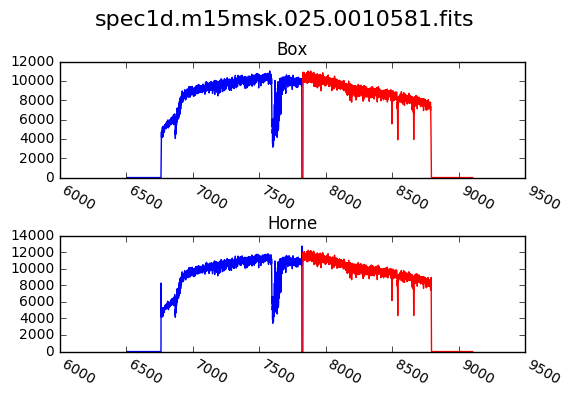

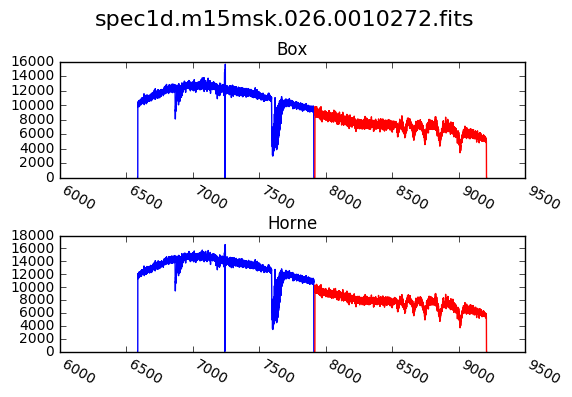

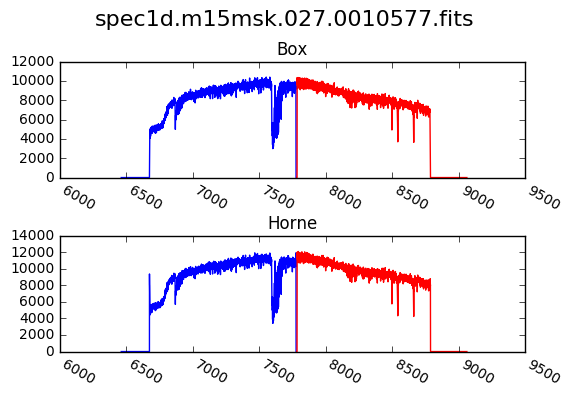

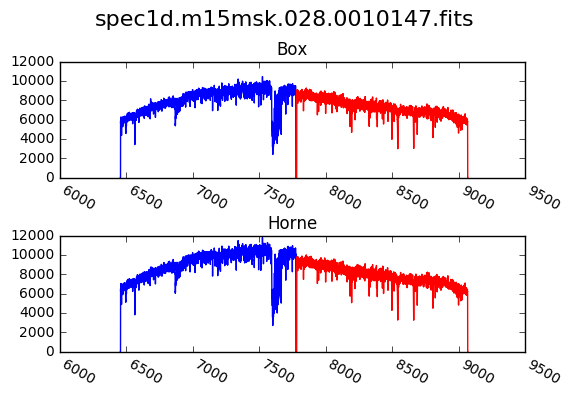

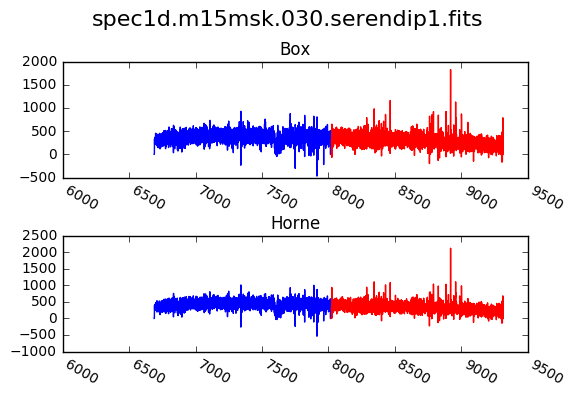

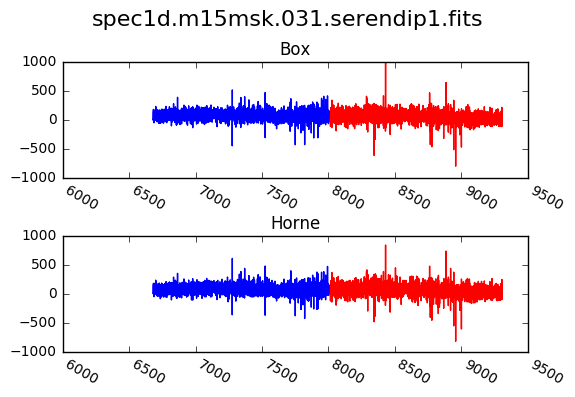

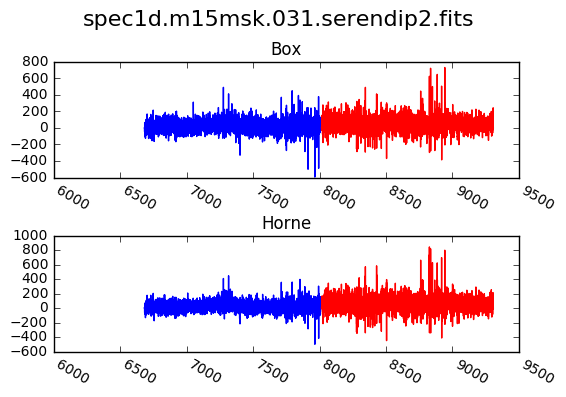

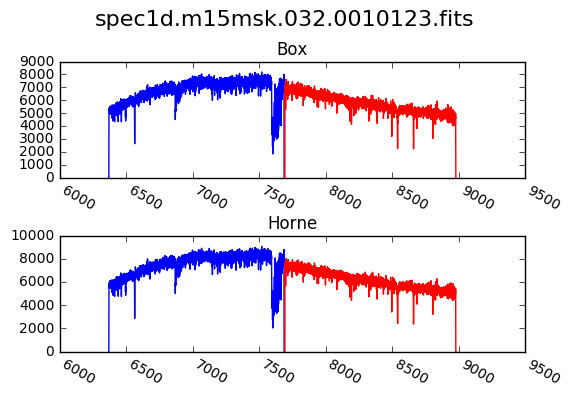

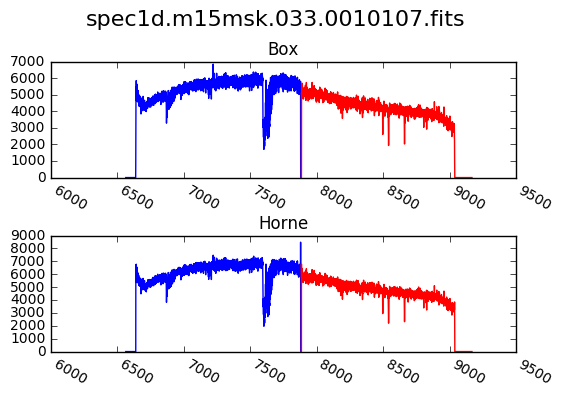

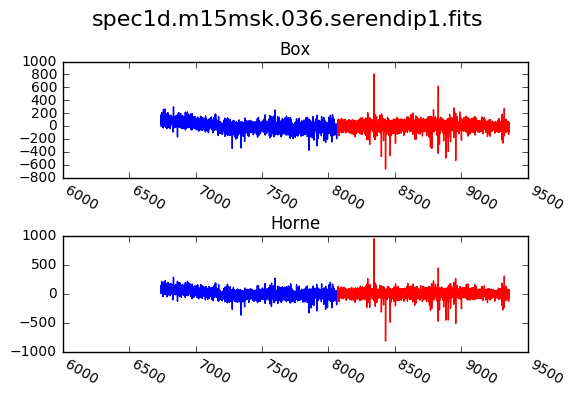

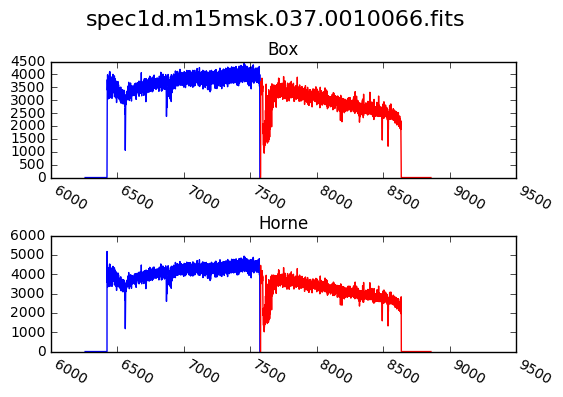

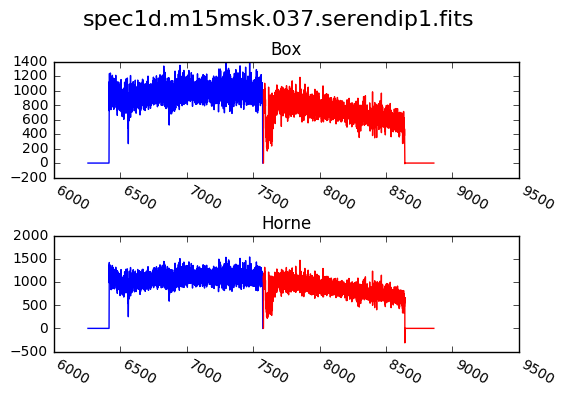

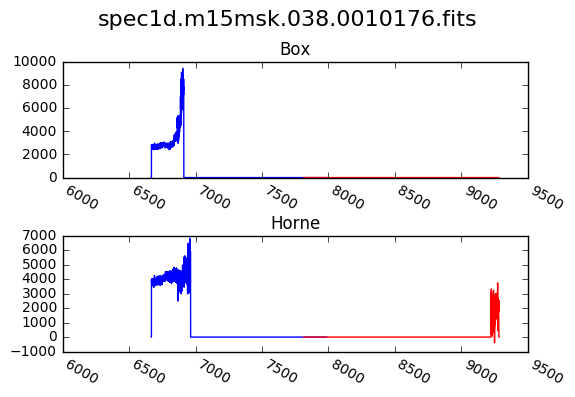

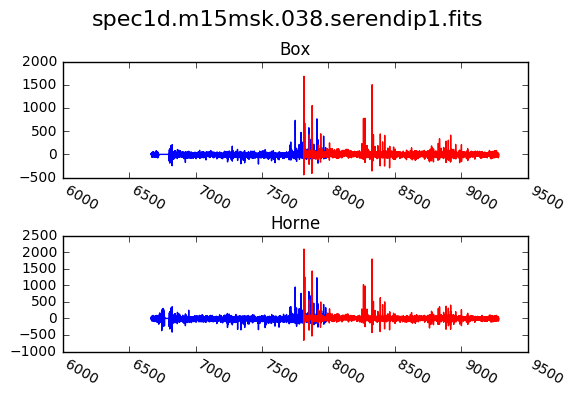

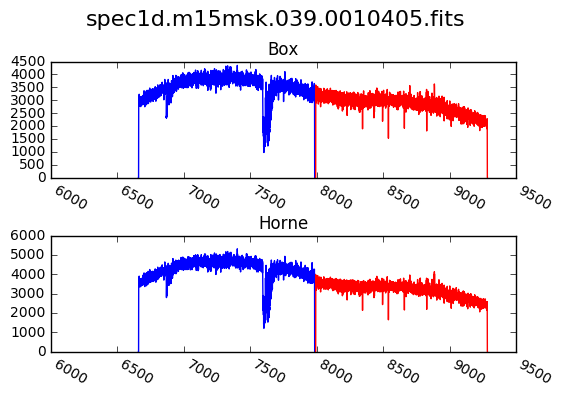

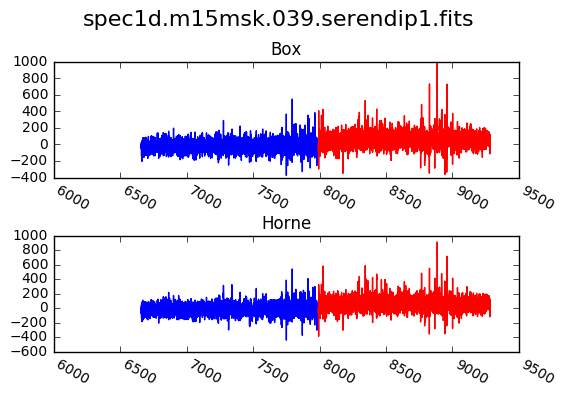

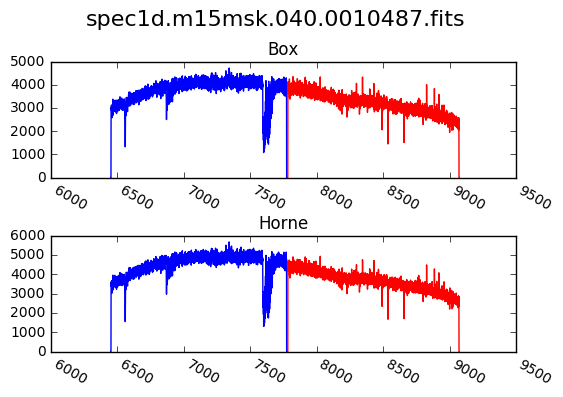

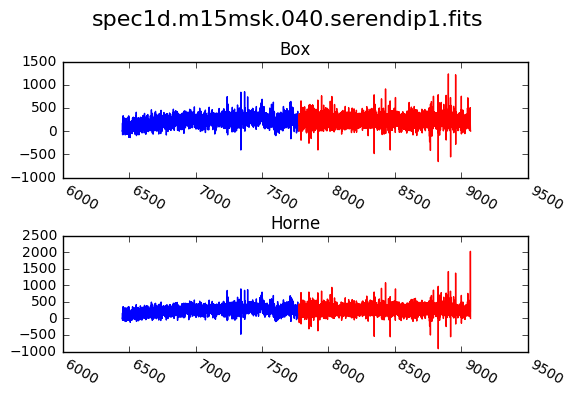

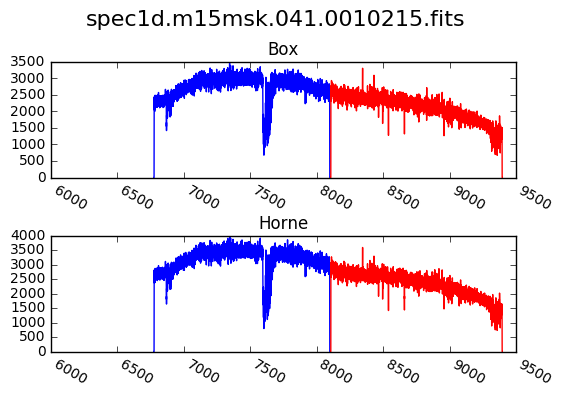

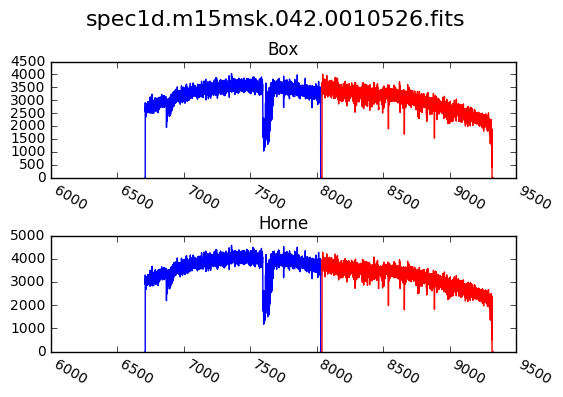

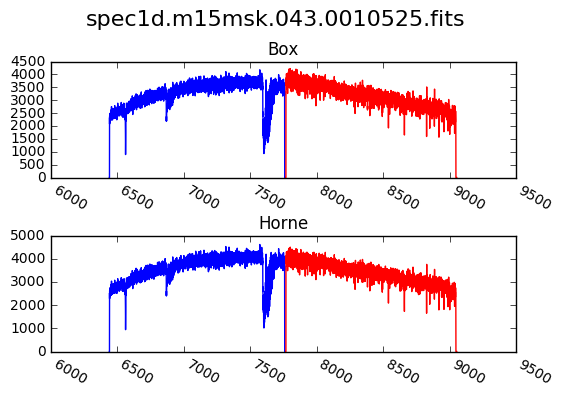

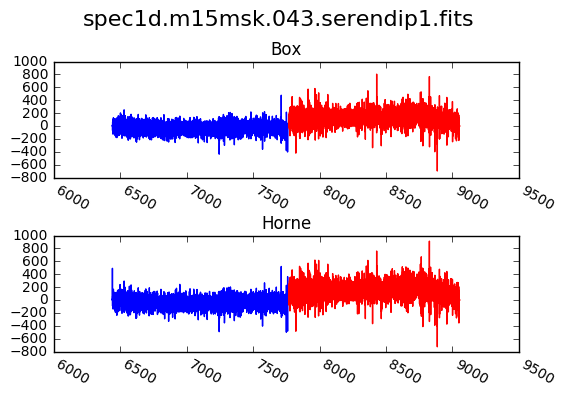

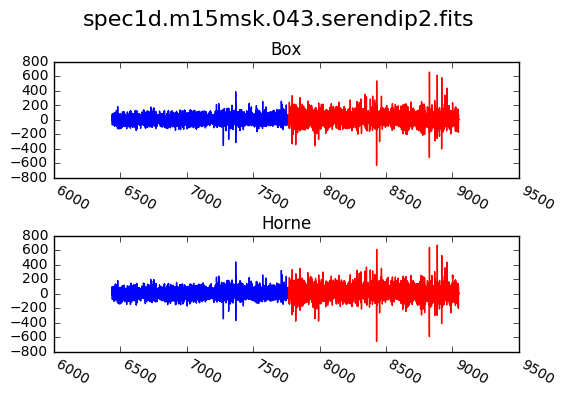

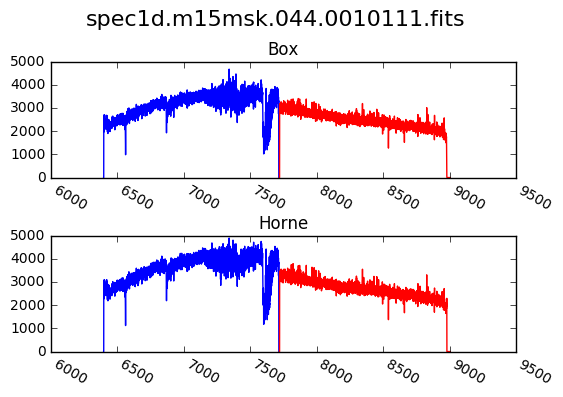

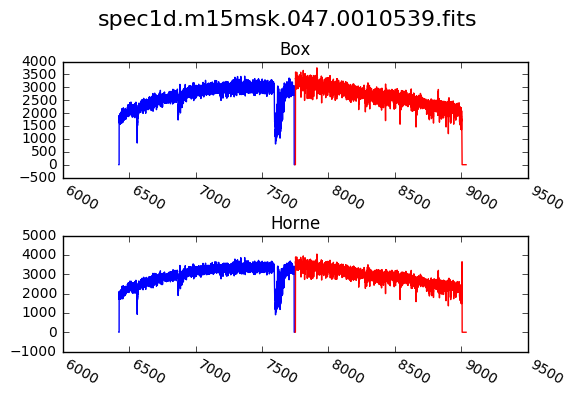

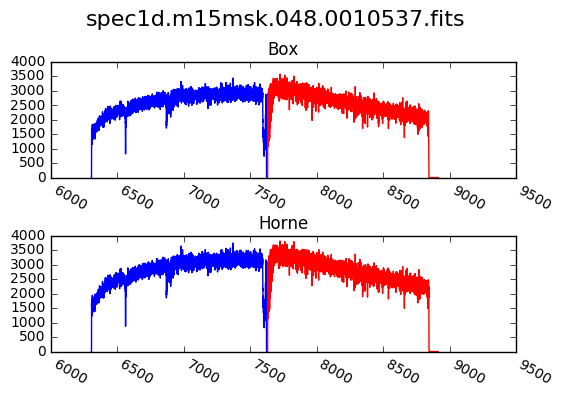

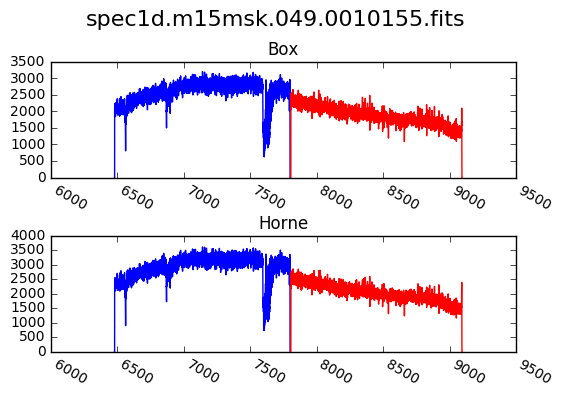

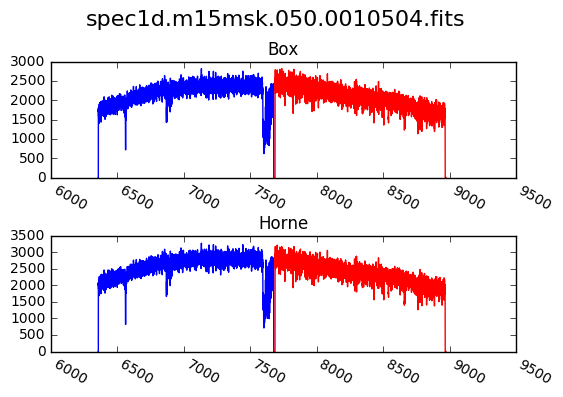

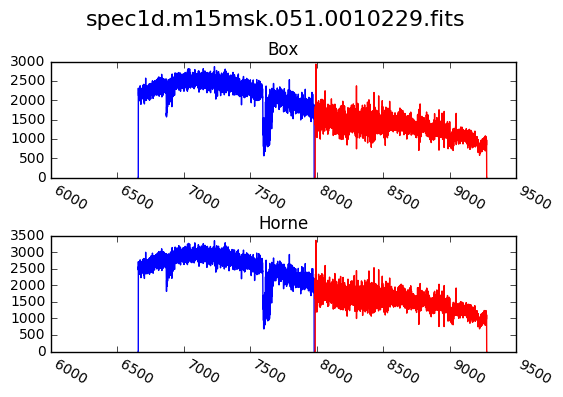

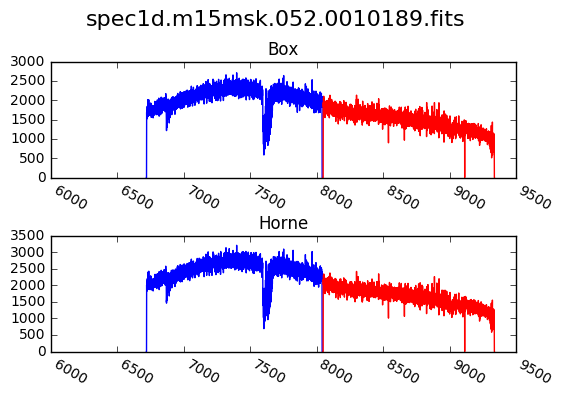

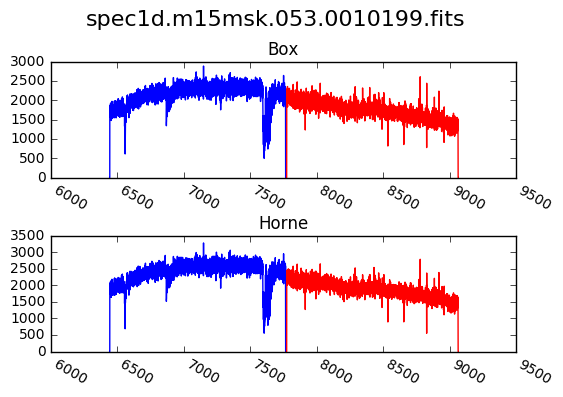

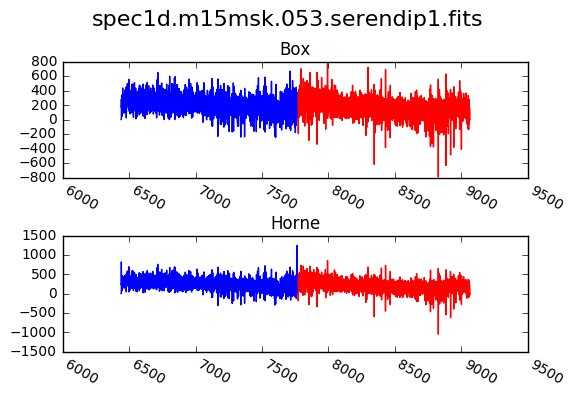

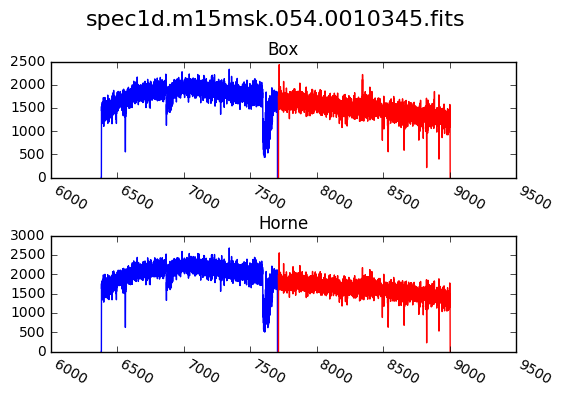

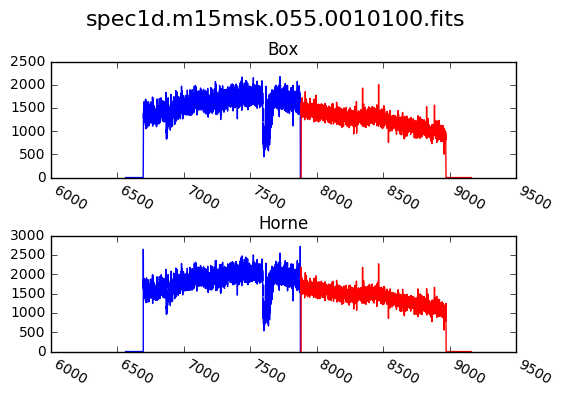

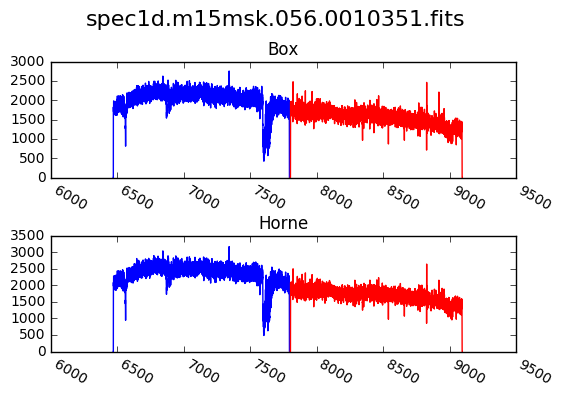

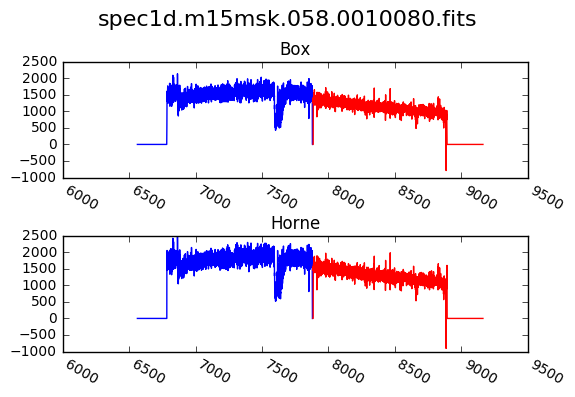

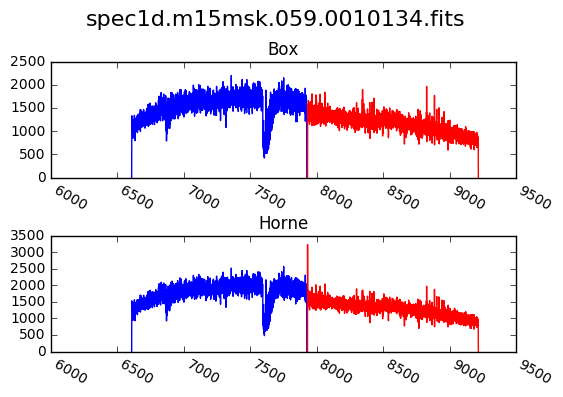

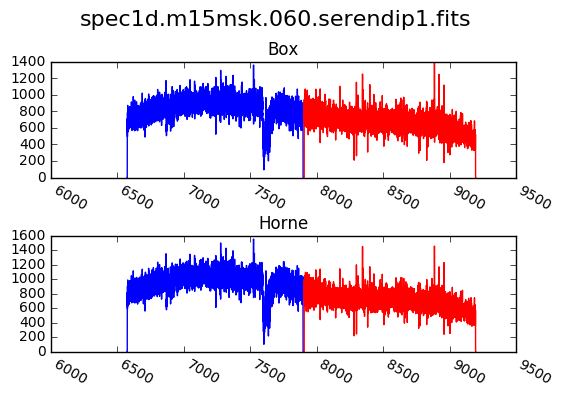

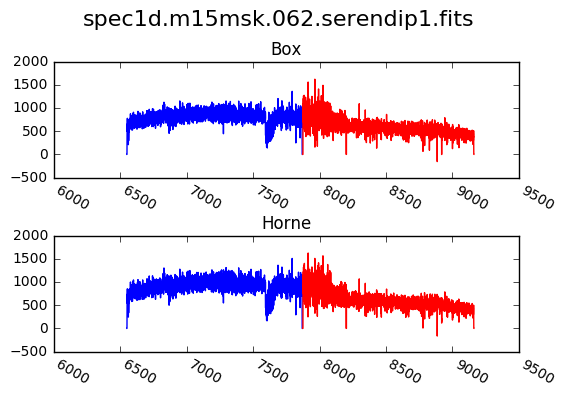

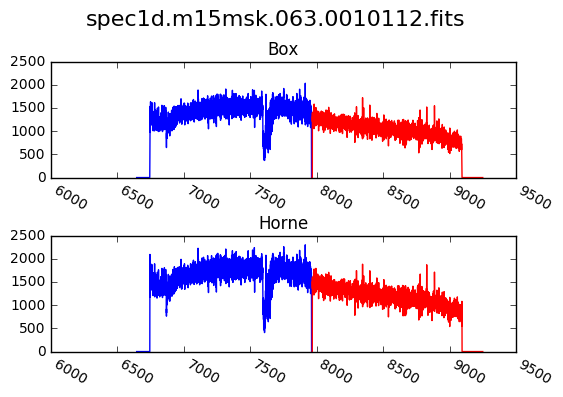

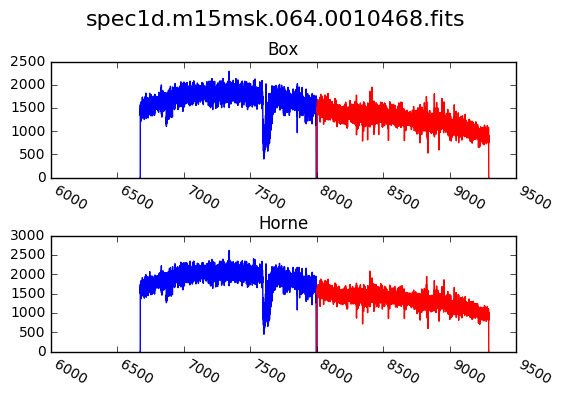

In [10]:
for Obj in ObjList:
    
    ObjHDUL = fits.open(FileDir + Obj)
    #AltObjHDUL = fits.open(AltDir + FileDir + Obj)
    
    BoxB = ObjHDUL['Bxspf-B'].data
    BoxR = ObjHDUL['Bxspf-R'].data
    HorneB = ObjHDUL['Horne-B'].data
    HorneR = ObjHDUL['Horne-R'].data
    
    #AltBoxB = AltObjHDUL['Bxspf-B'].data
    #AltBoxR = AltObjHDUL['Bxspf-R'].data
    #AltHorneB = AltObjHDUL['Horne-B'].data
    #AltHorneR = AltObjHDUL['Horne-R'].data
    
    ax1 = plt.subplot(211)
    plt.plot(BoxB['LAMBDA'][0],BoxB['SPEC'][0],c='b')
    plt.plot(BoxR['LAMBDA'][0],BoxR['SPEC'][0],c='R')
    plt.xlim(6000,9500)
    plt.title('Box')
    plt.setp(ax1.get_xticklabels(), rotation=330,horizontalalignment='left')
    
    ax2 = plt.subplot(212)
    plt.plot(HorneB['LAMBDA'][0],HorneB['SPEC'][0],c='b')
    plt.plot(HorneR['LAMBDA'][0],HorneR['SPEC'][0],c='R')
    plt.title('Horne')
    plt.xlim(6000,9500)
    plt.setp(ax2.get_xticklabels(), rotation=330,horizontalalignment='left')
    #plt.setp(ax2.get_yticklabels(), visible=False)
    
    #ax3 = plt.subplot(223)
    #plt.plot(AltBoxB['LAMBDA'][0],AltBoxB['SPEC'][0],c='b')
    #plt.plot(AltBoxR['LAMBDA'][0],AltBoxR['SPEC'][0],c='R')
    #plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    #plt.xlim(8450,8700)
    #plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    #plt.title('Alt Box')
    #plt.setp(ax3.get_xticklabels(), rotation=330,horizontalalignment='left')
    #
    #
    #ax4 = plt.subplot(224)
    #plt.plot(AltHorneB['LAMBDA'][0],AltHorneB['SPEC'][0],c='b')
    #plt.plot(AltHorneR['LAMBDA'][0],AltHorneR['SPEC'][0],c='R')
    #plt.title('Alt Horne')
    #plt.xlim(8450,8700)
    #plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    #plt.setp(ax4.get_yticklabels(), visible=False)
    #plt.setp(ax4.get_xticklabels(), rotation=330,horizontalalignment='left')
    
    plt.subplots_adjust(hspace=0.5, top=0.85)
    plt.suptitle(Obj, fontsize=16)
    
    if (savefig == True):
        plt.savefig(PlotDir + Obj[:-5]+'.png')
    
    
    plt.show()

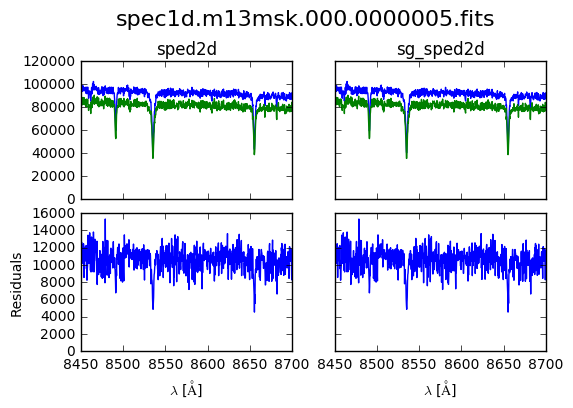

In [41]:
for Obj in ObjList[:1]:
    
    ObjHDUL = fits.open(FileDir + Obj)
    AltObjHDUL = fits.open(AltDir + FileDir + Obj)
    
    BoxB = ObjHDUL['Bxspf-B'].data
    BoxR = ObjHDUL['Bxspf-R'].data
    HorneB = ObjHDUL['Horne-B'].data
    HorneR = ObjHDUL['Horne-R'].data
    
    AltBoxB = AltObjHDUL['Bxspf-B'].data
    AltBoxR = AltObjHDUL['Bxspf-R'].data
    AltHorneB = AltObjHDUL['Horne-B'].data
    AltHorneR = AltObjHDUL['Horne-R'].data
    
    ax1 = plt.subplot(221)
    plt.plot(HorneR['LAMBDA'][0],HorneR['SPEC'][0])
    plt.plot(AltHorneR['LAMBDA'][0],AltHorneR['SPEC'][0])
    plt.xlim(8450,8700)
    plt.title('Horne')
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(223,sharex=ax1)
    plt.plot(HorneR['LAMBDA'][0],HorneR['SPEC'][0]-AltHorneR['SPEC'][0])
    plt.ylabel('Residuals')
    plt.xlim(8450,8700)
    plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    
    ax3 = plt.subplot(222)
    plt.plot(BoxR['LAMBDA'][0],BoxR['SPEC'][0])
    plt.plot(AltBoxR['LAMBDA'][0],AltBoxR['SPEC'][0])
    plt.xlim(8450,8700)
    plt.title('Box')
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    
    ax4 = plt.subplot(224,sharex=ax1)
    plt.plot(BoxR['LAMBDA'][0],BoxR['SPEC'][0]-AltBoxR['SPEC'][0])
    plt.xlim(8450,8700)
    plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    plt.setp(ax4.get_yticklabels(), visible=False)
     
    plt.subplots_adjust(hspace=0.1, top=0.85)
    plt.suptitle(Obj, fontsize=16)
    
    if (savefig == True):
        plt.savefig(PlotDir + Obj[:-5]+'.png')
    
    
    plt.show()
    
    
    
    ax1 = plt.subplot(221)
    plt.plot(HorneR['LAMBDA'][0],HorneR['SPEC'][0])
    plt.plot(BoxR['LAMBDA'][0],BoxR['SPEC'][0])
    plt.xlim(8450,8700)
    plt.title('sped2d')
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    ax2 = plt.subplot(223,sharex=ax1)
    plt.plot(HorneR['LAMBDA'][0],HorneR['SPEC'][0]-BoxR['SPEC'][0])
    plt.ylabel('Residuals')
    plt.xlim(8450,8700)
    plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    
    ax3 = plt.subplot(222)
    plt.plot(AltHorneR['LAMBDA'][0],AltHorneR['SPEC'][0])
    plt.plot(AltBoxR['LAMBDA'][0],AltBoxR['SPEC'][0])
    plt.xlim(8450,8700)
    plt.title('sg_sped2d')
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    
    ax4 = plt.subplot(224,sharex=ax1)
    plt.plot(AltHorneR['LAMBDA'][0],AltHorneR['SPEC'][0]-AltBoxR['SPEC'][0])
    plt.xlim(8450,8700)
    plt.xlabel(r'$\lambda$ [$\mathrm{\AA}$]')
    plt.setp(ax4.get_yticklabels(), visible=False)
     
    plt.subplots_adjust(hspace=0.1, top=0.85)
    plt.suptitle(Obj, fontsize=16)
    
    if (savefig == True):
        plt.savefig(PlotDir + Obj[:-5]+'.png')
    
    
    plt.show()

In [46]:
ObjInfoHDUL = fits.open('U112/n19msk/obj_info.n19msk.fits')

In [55]:
ObjInfoHDUL[1].data['OBJTYPE']

ColDefs(
    name = 'OBJNO'; format = '9A'
    name = 'SLITNO'; format = 'J'
    name = 'SLITFILE'; format = '21A'
    name = 'OBJTYPE'; format = 'A'
    name = 'COLOR'; format = 'A'
    name = 'CAT_OBJPOS'; format = 'E'
    name = 'CAT_FWHM'; format = 'E'
    name = 'OBJPOS'; format = 'E'
    name = 'FWHM'; format = 'E'
    name = 'CORR_FWHM'; format = 'E'
    name = 'NROWS'; format = 'E'
    name = 'S2N_FWHM'; format = 'E'
    name = 'S2N_WINDOW'; format = 'E'
    name = 'RA'; format = '11A'
    name = 'DEC'; format = '11A'
    name = 'XMM'; format = 'E'
    name = 'YMM'; format = 'E'
    name = 'MAGB'; format = 'E'
    name = 'MAGR'; format = 'E'
    name = 'MAGI'; format = 'E'
    name = 'OBJPA'; format = 'E'
)